In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [78]:
util.set_sns_style(style='dark', min_fontsize=8)
%matplotlib notebook

rootdir = util.get_rootdir()
rootdir

'/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'

In [143]:
#srcdir = '/mnt/minerva/plume-tracking/behavior-logfiles'
#srcdir = '/mnt/minerva/tethered-tap/behavior'
rootdir = '/Volumes/Julie'
experiment = 'P1_activation' 
srcdir = os.path.join(rootdir, 'courtship-tethered/behavior', experiment)

logdir = os.path.join(srcdir, 'logfiles')
figdir = os.path.join(srcdir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)
print("Saving figures to: {}".format(figdir))


#ftstamp = '20230214-1435'
# ftstamp = '20230214-1355'
ftstamp = '20230215-1627'
if ftstamp=='20230214-1355':
    cdict = {
        '20230214-1350': 'dark-tap-closedloop',
        '20230214-1355': 'dark-tap-openloop',
        '20230214-1422': 'dark-tap-openloop',
        '20230214-1435': 'dark-tap-closedloop',
    #     '20230214-1515': 'dark-tap-closedloop'
    }
elif ftstamp=='20230215-1627':
    cdict = {
        '20230215-1627': 'dark-tap-closedloop-ledoff',
        '20230215-1646': 'dark-tap-closedloop-ledon',
        '20230215-1723': 'dark-notap-closedloop-ledon',
    }

# curr_cond = cdict[ftstamp]

# found_logfiles = sorted(glob.glob(os.path.join(logdir, '{}*.log'.format(ftstamp))), key=util.natsort)
# for fi, fn in enumerate(found_logfiles):
#     print('{}: {}'.format(fi, os.path.split(fn)[-1]))

Saving figures to: /Volumes/Julie/courtship-tethered/behavior/P1_activation/figures


In [144]:
xvar='ft_posx'
yvar='ft_posy'
plot = False

dlist=[]
for ftstamp, curr_cond in cdict.items():

    found_logfiles = sorted(glob.glob(os.path.join(logdir, '{}*.log'.format(ftstamp))), key=util.natsort)
    for fi, fn in enumerate(found_logfiles):
        print('{}: {}'.format(fi, os.path.split(fn)[-1]))

    fpath = found_logfiles[0]
    print(fpath)

    df0 = butil.load_dataframe(fpath, is_odor=False)
    # process some stuff
    df0 = butil.calculate_speed(df0, xvar=xvar, yvar=yvar)
    df0 = butil.calculate_distance(df0, xvar=xvar, yvar=yvar)
    df0['condition'] = curr_cond

    if plot:
        fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
        fig, ax = pl.subplots(figsize=(5, 10))
        dur_min = df0['rel_time'].max() / 60.
        # sns.lineplot(x='ft_posx', y='ft_posy', data=df_, ax=ax)
        ax.plot(df0['ft_posx'], df0['ft_posy'], lw=0.5, c='w')
        ax.set_title('{} ({:.2f} min)'.format(curr_cond, dur_min))
        util.label_figure(fig, '{}'.format(os.path.split(fpath)[-1]))
        figname = '{}'.format(fly_id)
        print(figname)
        pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)
    dlist.append(df0)
print(df0.shape)
df = pd.concat(dlist, axis=0).reset_index(drop=True)
df.head()

0: 20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000.log
/Volumes/Julie/courtship-tethered/behavior/P1_activation/logfiles/20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000.log
0: 20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000.log
/Volumes/Julie/courtship-tethered/behavior/P1_activation/logfiles/20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000.log
0: 20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000.log
/Volumes/Julie/courtship-tethered/behavior/P1_activation/logfiles/20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000.log
(177324, 40)


,index,timestamp -- motor_step_command,mfc1_stpt,mfc2_stpt,mfc3_stpt,led1_stpt,led2_stpt,sig_status,ft_posx,ft_posy,...,trial,fly_id,trial_id,cum_time,speed,upwind_speed,crosswind_speed,euclid_dist,upwind_dist,crosswind_dist
0,1,02/15/2023-16:27:17.719977 -- 800000,0.0,0.0,0.0,0.0,0.0,1,-0.002683,-0.000586,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.000000,7.112330,-5.373224,4.659796,0.000000,0.000000,0.000000
1,2,02/15/2023-16:27:17.724968 -- 799999,0.0,0.0,0.0,0.0,0.0,0,0.020574,-0.027404,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.004991,5.952850,-2.750320,5.279410,0.035498,-0.026818,0.023257
2,3,02/15/2023-16:27:17.730087 -- 799999,0.0,0.0,0.0,0.0,0.0,1,0.050692,-0.028392,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.015101,17.381599,16.986776,-3.683673,0.030134,-0.000988,0.030118
3,4,02/15/2023-16:27:17.735363 -- 800000,0.0,0.0,0.0,0.0,0.0,0,-0.017718,0.149175,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.030487,20.938907,17.220640,-11.911649,0.190289,0.177566,0.068410
4,5,02/15/2023-16:27:17.741472 -- 800001,0.0,0.0,0.0,0.0,0.0,1,-0.084922,0.167665,...,20230215-162717,20230215-fly3v,20230215-fly3v_20230215-162717,0.051982,11.940128,3.262280,-11.485826,0.069701,0.018490,0.067203


In [145]:
df = pd.concat(dlist, axis=0).reset_index(drop=True)


In [146]:
df['fly_id'].unique()

array(['20230215-fly3v'], dtype=object)

In [147]:
fly_id = df['fly_id'].unique()[0]
print(fly_id)
fig_id = srcdir
print(fig_id)

20230215-fly3v
/Volumes/Julie/courtship-tethered/behavior/P1_activation


In [150]:
speed_min, speed_max = df['speed'].min(), df['speed'].max()
print("Speed: {:.2f} - {:.2f} mm/s".format(speed_min, speed_max))

df['speed_abs'] = abs(df['speed'])
speed_abs_min, speed_abs_max = df['speed_abs'].min(), df['speed_abs'].max()
print("Speed (abs): {:.2f} - {:.2f} mm/s".format(speed_abs_min, speed_abs_max))

speed_max = 40

dur_min, dur_max = df['rel_time'].min()/60., df['rel_time'].max()/60.
print("Duration: {:.2f} - {:.2f} min".format(dur_min, dur_max))
df['duration_min'] = df['rel_time']/60.

Speed: 0.00 - 126.54 mm/s
Speed (abs): 0.00 - 126.54 mm/s
Duration: 0.00 - 34.33 min


In [167]:
hue_var = 'duration_min'
# ----------------------------------------------------
# if hue_var == 'duration_min':
#     hue_min, hue_max = dur_min, dur_max
#     palette='viridis'
# elif hue_var == 'speed':
hue_min, hue_max = df[hue_var].min(), df[hue_var].max()
if hue_var == 'speed':
    palette='viridis' #'viridis'
    hue_min = 0
    hue_max=50
elif hue_var == 'duration_min':
    hue_min = 0
    hue_max = 30
    palette='viridis'
else:
    palette='coolwarm' #'viridis'
    hue_min = -30
    hue_max=30
    
print("Hue: {} ({:.2f}, {:.2f})".format(hue_var, hue_min, hue_max))


Hue: duration_min (0.00, 30.00)


### traj by speed or dur

In [168]:
df['condition'].unique()

array(['dark-tap-closedloop-ledoff', 'dark-tap-closedloop-ledon',
       'dark-notap-closedloop-ledon'], dtype=object)

<IPython.core.display.Javascript object>


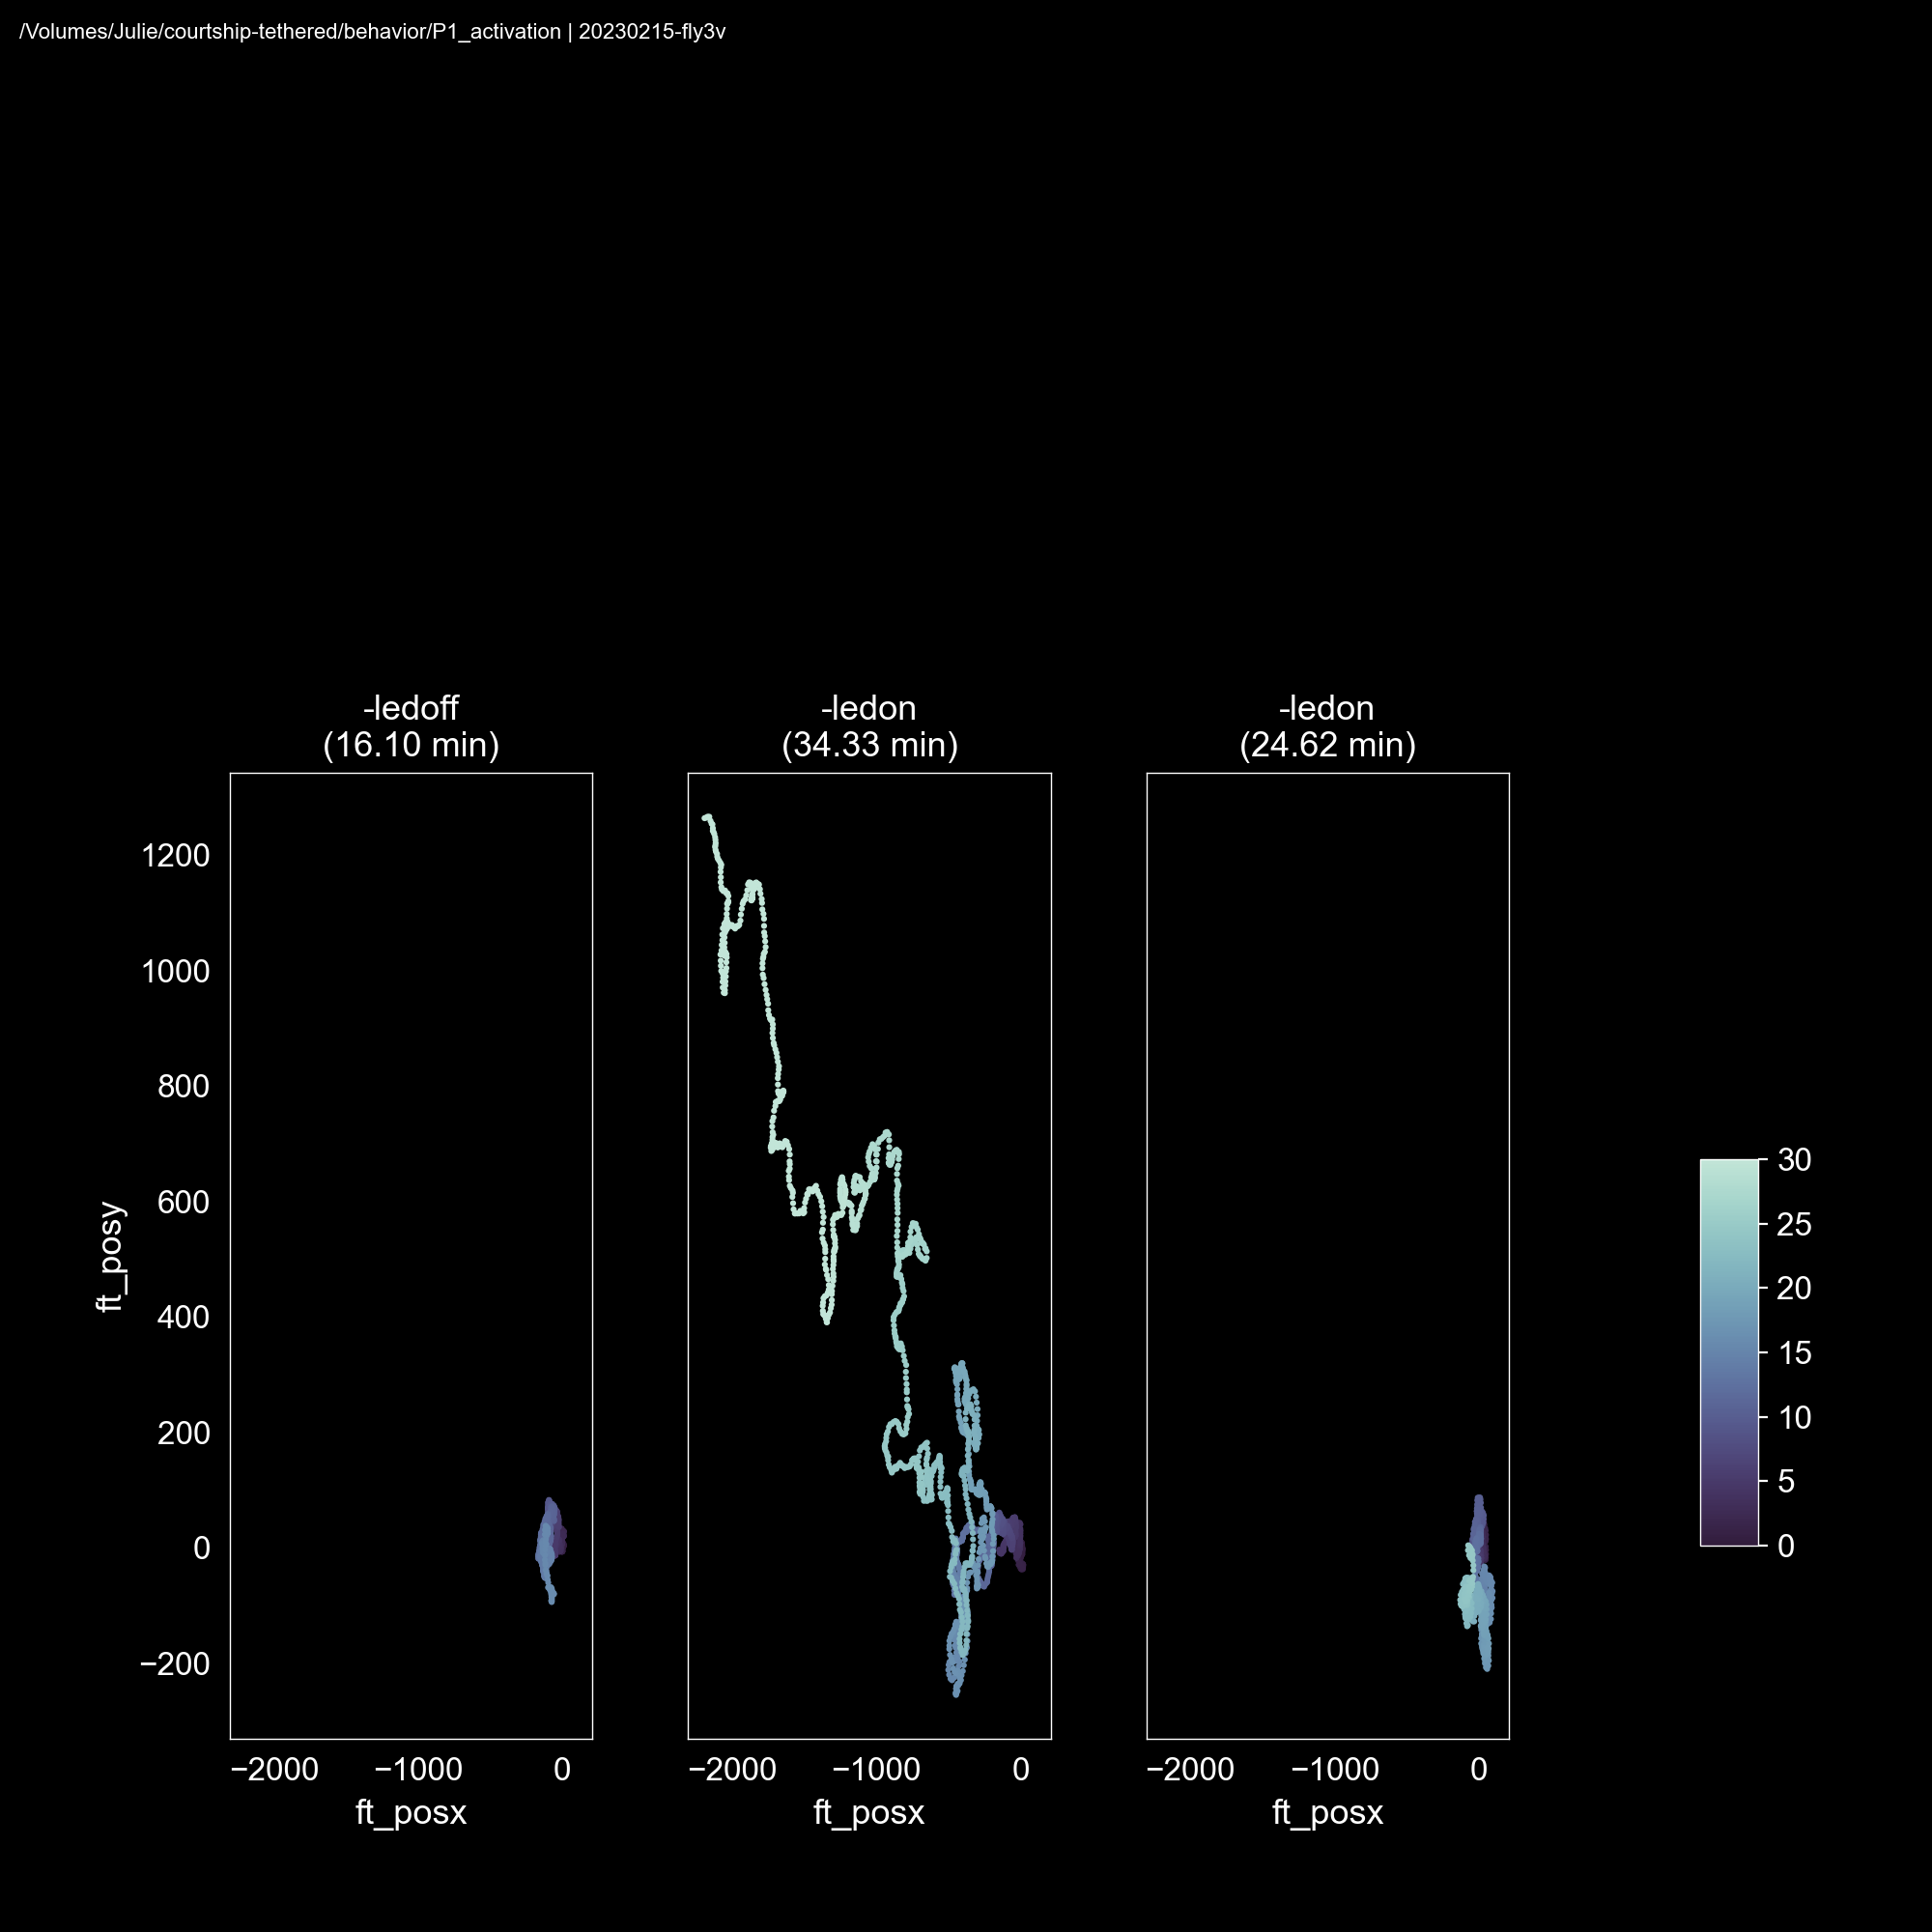

20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000
20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000
20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000
20230215-fly3v_hue-duration_min-blues


/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_60406/3164939594.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.tight_layout()


In [238]:
# plotdf = df[df['condition']=='dark-tap-closedloop'].copy()
plotdf = df.copy()
fnames = plotdf['filename'].unique()
fig, axn = pl.subplots(1, len(fnames), figsize=(10, 10), sharey=True, sharex=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, reverse=True)
norm = pl.Normalize(hue_min, hue_max) #.min(), survival_rates.max())
sm = pl.cm.ScalarMappable(cmap=cmap, norm=norm)

for fi, (fp, df_) in enumerate(plotdf.groupby('filename')):
    print(fp)
    ax=axn[fi]
    exp_dur = df_['rel_time'].max() / 60.
    curr_cond = df_['condition'].unique()[0]
    #ax.plot(df0['ft_posx'], df0['ft_posy'], lw=0.5, c='w')
    sns.scatterplot(data=df_.iloc[0::100], ax=ax, x='ft_posx', y='ft_posy', 
                    hue=hue_var, hue_norm=(hue_min, hue_max), palette=cmap, 
                    edgecolor='none', s=5, alpha=1, legend=fi==2)
    if fi==2:
        #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
        cb_ax = fig.add_axes([.88,.2,.03,.2])
        ax.get_legend().remove()
        ax.figure.colorbar(sm, ax=ax, cax=cb_ax)

    ax.set_title('{}\n({:.2f} min)'.format(curr_cond.split('loop')[-1], exp_dur))
    ax.set_aspect(4)
util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_hue-{}-blues'.format(fly_id, hue_var)
pl.tight_layout()
print(figname)
pl.subplots_adjust(bottom=0.1, right=0.8, left=0.1, top=0.6)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


## merge restarts

In [82]:
util.set_sns_style(style='dark', min_fontsize=12)

In [88]:
plotdf = df[df['condition']=='dark-tap-closedloop'].copy()
sorted_filenames = sorted(plotdf['filename'].unique())
print(sorted_filenames)
# Get last points of 1st file
last_x, last_y, last_t = plotdf[plotdf['filename']==sorted_filenames[0]][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
print(last_x, last_y, last_t)

['20230214-135003_P1_activation_fly1vM-cs-4do_001', '20230214-143528_P1_activation_fly1vM-cs-4do_004']
-37.114802340924 -196.50942840782105 141.6132299900055


In [89]:
curr_xvs = plotdf[plotdf['filename']==sorted_filenames[1]]['ft_posx'].values
curr_yvs = plotdf[plotdf['filename']==sorted_filenames[1]]['ft_posy'].values
curr_ts = plotdf[plotdf['filename']==sorted_filenames[1]]['rel_time'].values

# add offsets
plotdf.loc[plotdf['filename']==sorted_filenames[1], 'ft_posx'] = curr_xvs + last_x
plotdf.loc[plotdf['filename']==sorted_filenames[1], 'ft_posy'] = curr_yvs + last_y
plotdf.loc[plotdf['filename']==sorted_filenames[1], 'rel_time'] = curr_ts + last_t

In [90]:
plotdf.loc[17070:]['ft_posx']

17070     -37.114802
281110    -37.117129
281111    -37.107892
281112    -37.109355
281113    -37.109489
             ...    
547831   -402.755064
547832   -402.828981
547833   -402.868815
547834   -402.904405
547835   -402.941345
Name: ft_posx, Length: 266727, dtype: float64

<IPython.core.display.Javascript object>


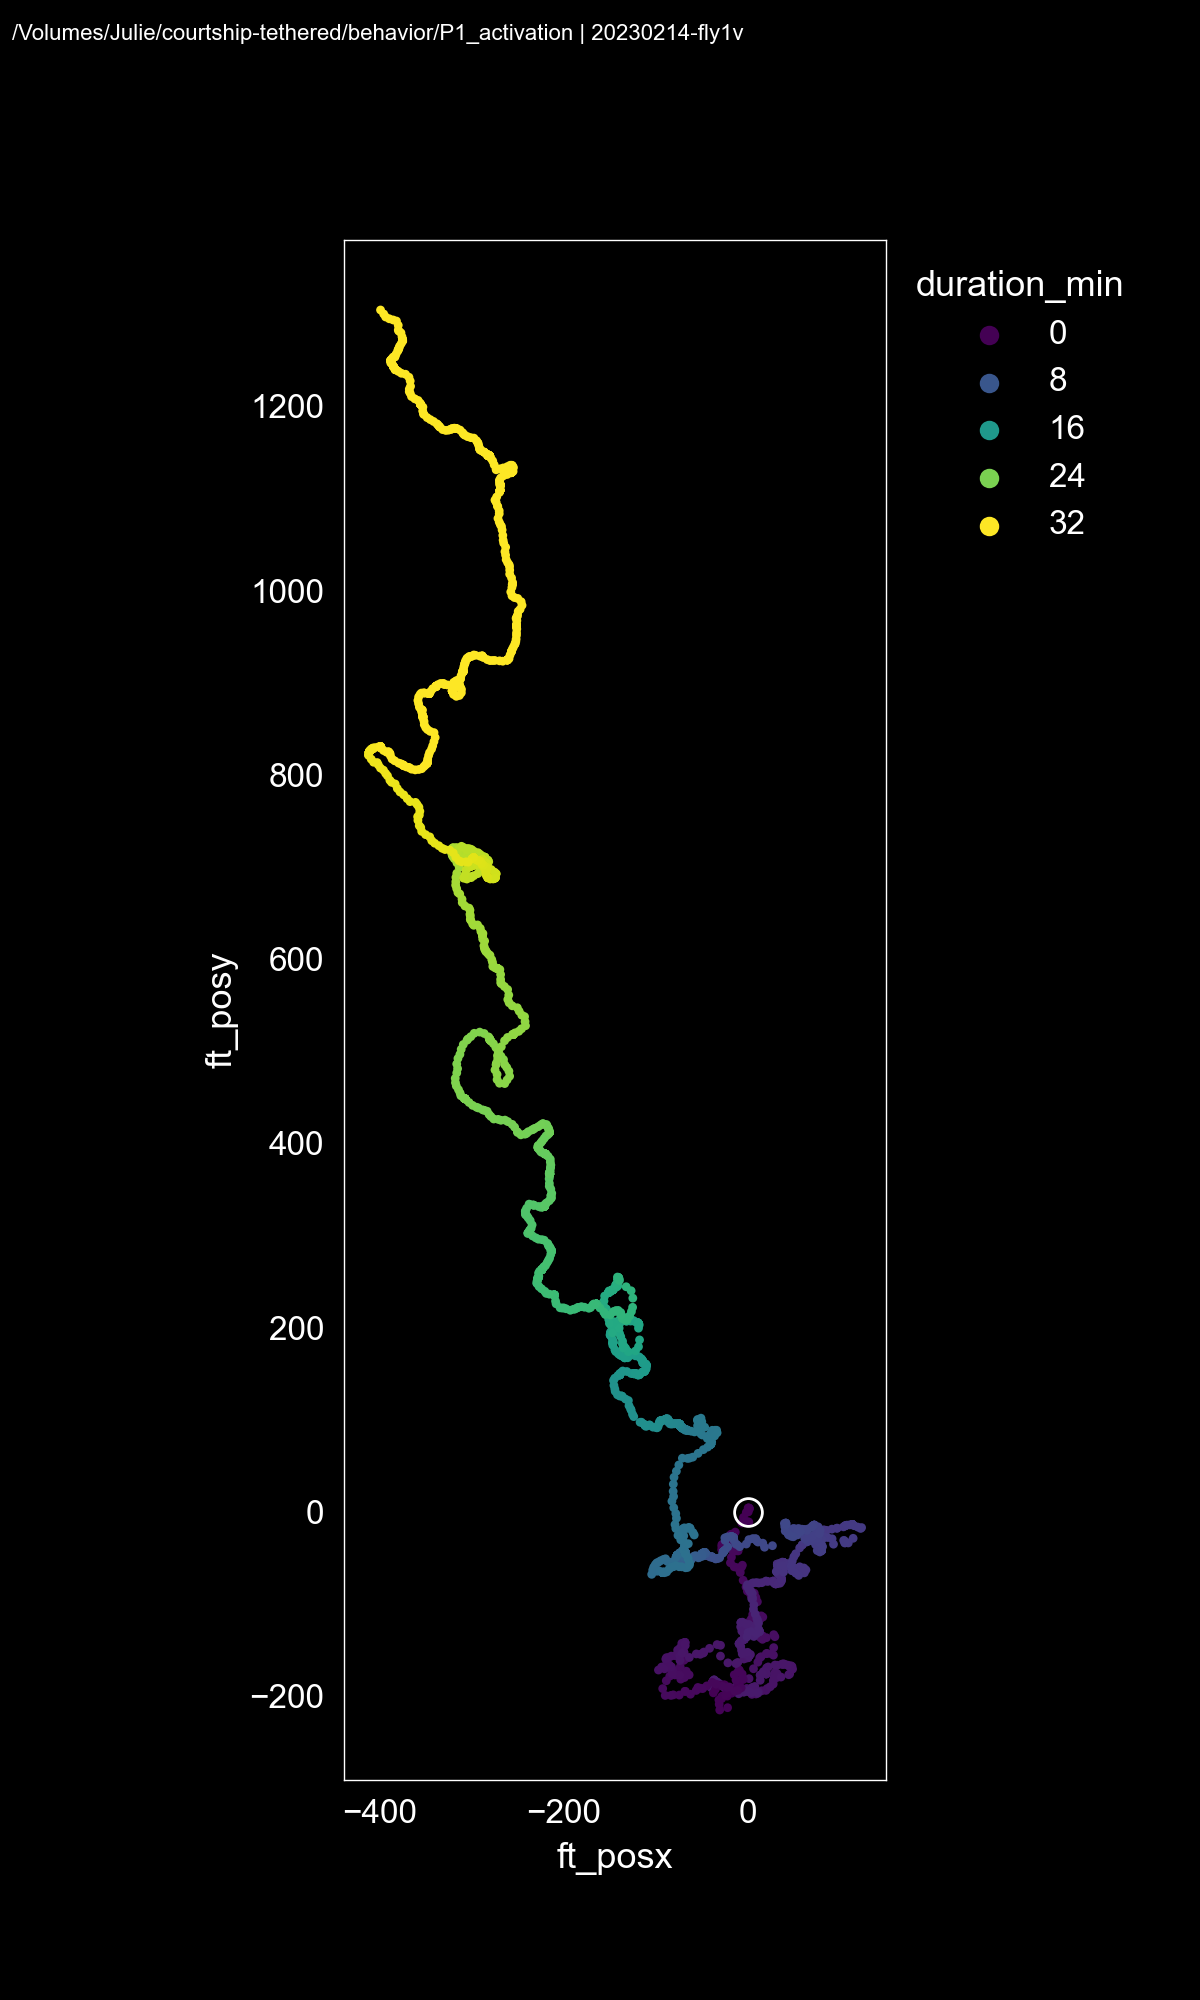

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_60406/636016524.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(plotdf.iloc[0]['ft_posx'], plotdf.iloc[0]['ft_posy'], 'w', marker='o',


20230214-fly1v_hue-duration_min_merged


In [94]:
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, reverse=True)
norm = pl.Normalize(hue_min, hue_max) #.min(), survival_rates.max())
sm = pl.cm.ScalarMappable(cmap=cmap, norm=norm)

fig, ax= pl.subplots(figsize=(6,10))
sns.scatterplot(data=plotdf.iloc[0::100], ax=ax, x='ft_posx', y='ft_posy', 
                hue=hue_var, hue_norm=(hue_min, hue_max),
                palette=cmap, edgecolor='none', s=10, alpha=1)
ax.set_aspect(1)
#sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
cb_ax = fig.add_axes([.88,.2,.03,.2])
ax.get_legend().remove()
ax.figure.colorbar(sm, ax=ax, cax=cb_ax)

ax.plot(plotdf.iloc[0]['ft_posx'], plotdf.iloc[0]['ft_posy'], 'w', marker='o',
       lw=0.5, color='w', fillstyle='none', markersize=10)
util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_hue-{}_merged'.format(fly_id, hue_var)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))

<IPython.core.display.Javascript object>


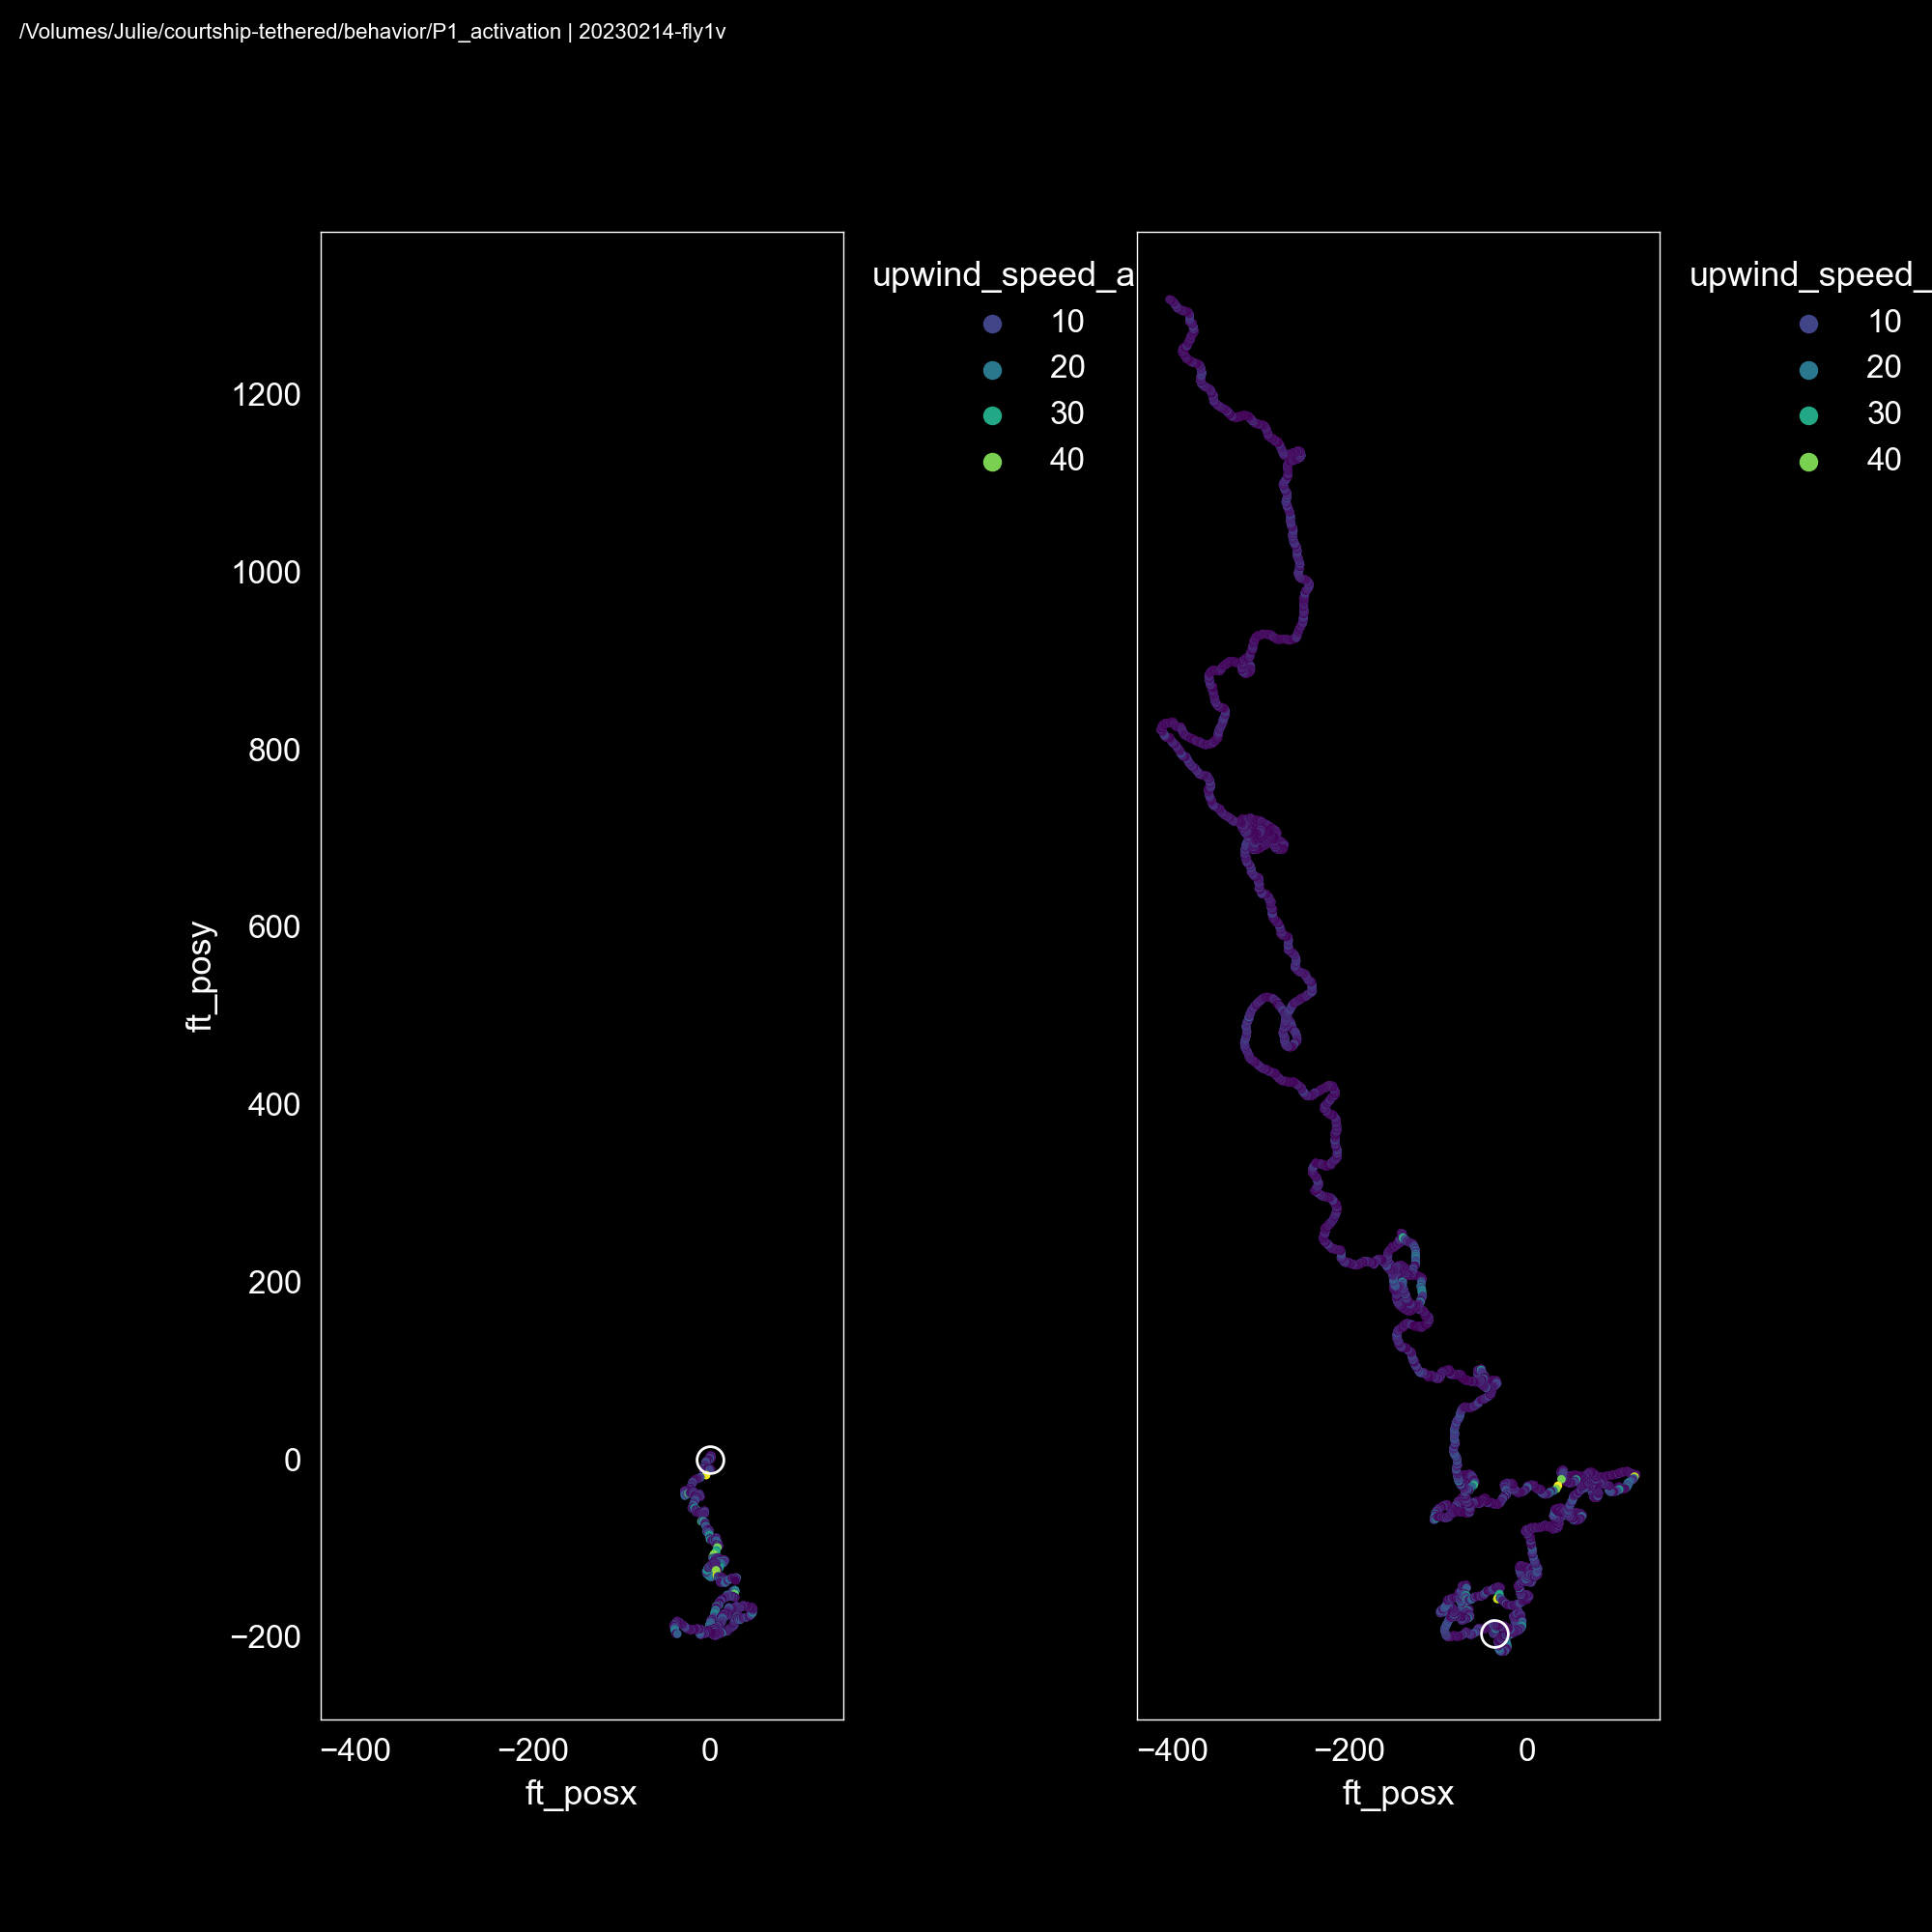

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_60406/644448851.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(df_.iloc[0]['ft_posx'], df_.iloc[0]['ft_posy'], 'w', marker='o',
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_60406/644448851.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(df_.iloc[0]['ft_posx'], df_.iloc[0]['ft_posy'], 'w', marker='o',


In [138]:
# fig, axn = pl.subplots(1, len(fnames), figsize=(6, 8), sharey=True, sharex=True)
# for fi, (fp, df_) in enumerate(plotdf.groupby('filename')):
#     print(fp)
#     ax=axn[fi]
#     exp_dur = df_['rel_time'].max() / 60.
#     curr_cond = df_['condition'].unique()[0]
    
#     #ax.plot(df0['ft_posx'], df0['ft_posy'], lw=0.5, c='w')
#     sns.scatterplot(data=df_.iloc[0::100], ax=ax, x='ft_posx', 
#             y='ft_posy', hue='upwind_speed', #hue=hue_var, hue_norm=(hue_min, hue_max), 
#             palette=palette, edgecolor='none', s=10, alpha=1)
#     ax.set_title('{} ({:.2f} min)'.format(curr_cond, exp_dur))
plotdf_speed = plotdf[(plotdf[var]<=50) & (plotdf[var]>=-50)].copy()
plotdf_speed['upwind_speed_abs'] = abs(plotdf_speed['upwind_speed'])

fig, axn = pl.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)
for fi, (fp, df_) in enumerate(plotdf_speed.groupby('filename')):
    ax=axn[fi]
    sns.scatterplot(data=df_.iloc[0::10], ax=ax, x='ft_posx', y='ft_posy', 
                    hue='upwind_speed_abs', 
                    hue_norm=(0, 50), palette='viridis', edgecolor='none', s=10, alpha=1)
    ax.set_aspect(1)
    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
    ax.plot(df_.iloc[0]['ft_posx'], df_.iloc[0]['ft_posy'], 'w', marker='o',
           lw=0.5, color='w', fillstyle='none', markersize=10)
util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_hue-{}_merged'.format(fly_id, hue_var)

In [141]:
plotdf.loc[plotdf['rel_time']<=3, 'epoch'] = 'pre'
plotdf.loc[plotdf['rel_time']>3, 'epoch'] = 'post'

In [142]:
plotdf_speed.groupby('epoch')['upwind_speed_abs'].mean()

epoch
post    1.925796
pre     2.876330
Name: upwind_speed_abs, dtype: float64

<IPython.core.display.Javascript object>


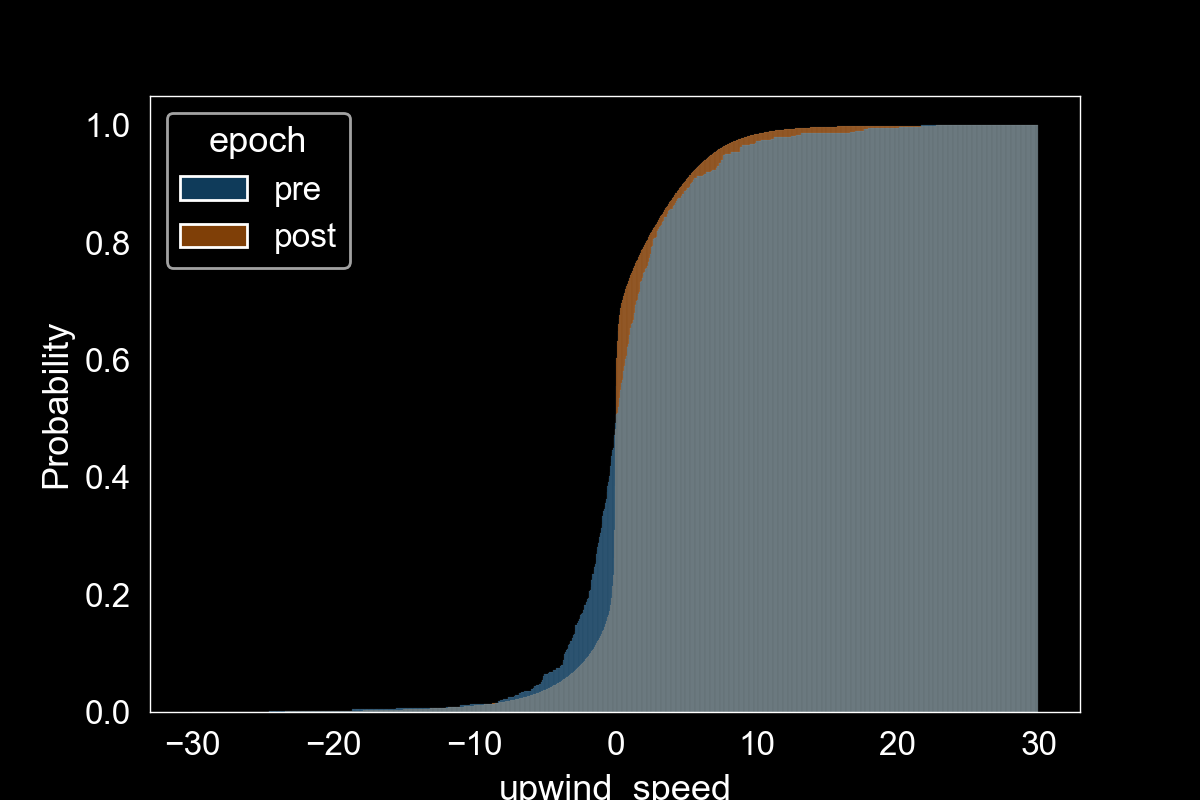

<AxesSubplot: xlabel='upwind_speed', ylabel='Probability'>

In [109]:
fig, ax = pl.subplots()
var = 'upwind_speed'
sns.histplot(data=plotdf[(plotdf[var]<=30) & (plotdf[var]>=-30)], x=var, hue='epoch', ax=ax, 
            common_norm=False, cumulative=True, stat='probability')

## first X min 

<IPython.core.display.Javascript object>


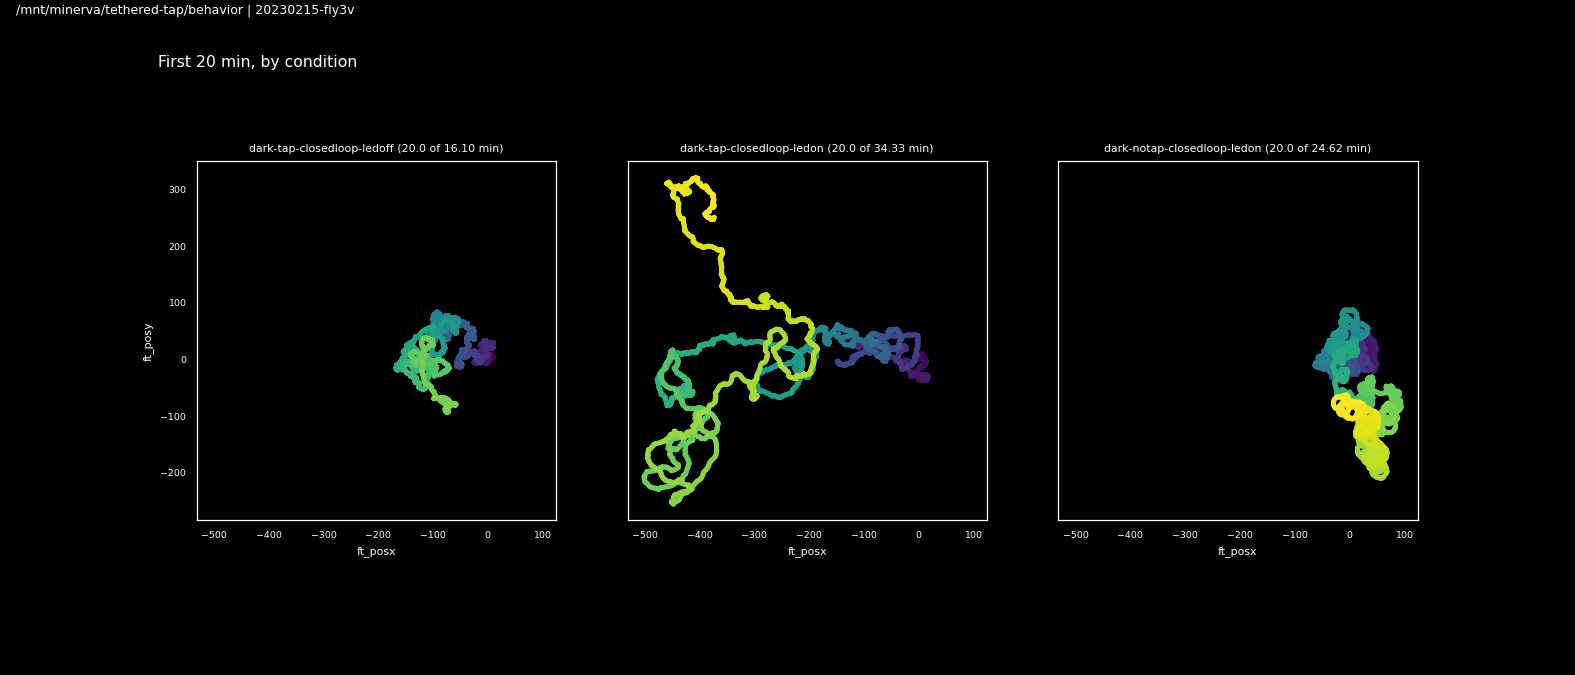

20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000
20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000
20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000
20230215-fly3v_hue-duration_min_first-20min


In [258]:
look_dur=20

fnames = df['filename'].unique()
fig, axn = pl.subplots(1, len(fnames), figsize=(14,6), sharey=True, sharex=True)

for fi, (fp, df_) in enumerate(df.groupby('filename')):
    print(fp)
    ax=axn[fi]
    exp_dur = df_['rel_time'].max() / 60.
    curr_cond = df_['condition'].unique()[0]
    
    plotdf = df_[df_['duration_min']<=look_dur].iloc[0::10].copy()
    sns.scatterplot(data=plotdf, ax=ax, x='ft_posx', y='ft_posy', hue=hue_var, hue_norm=(hue_min, look_dur), palette=palette, edgecolor='none', s=10, alpha=0.9, legend=False)
    ax.set_title('{} ({:.1f} of {:.2f} min)'.format(curr_cond, look_dur, exp_dur))
    ax.set_box_aspect(1)
    
fig.text(0.1, 0.9, 'First {} min, by condition'.format(look_dur))
    
util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_hue-{}_first-{}min'.format(fly_id, hue_var, look_dur)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


## heading

In [176]:
import plotting as putil

In [177]:
print(fnames)

['20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000'
 '20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000'
 '20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000']


<IPython.core.display.Javascript object>


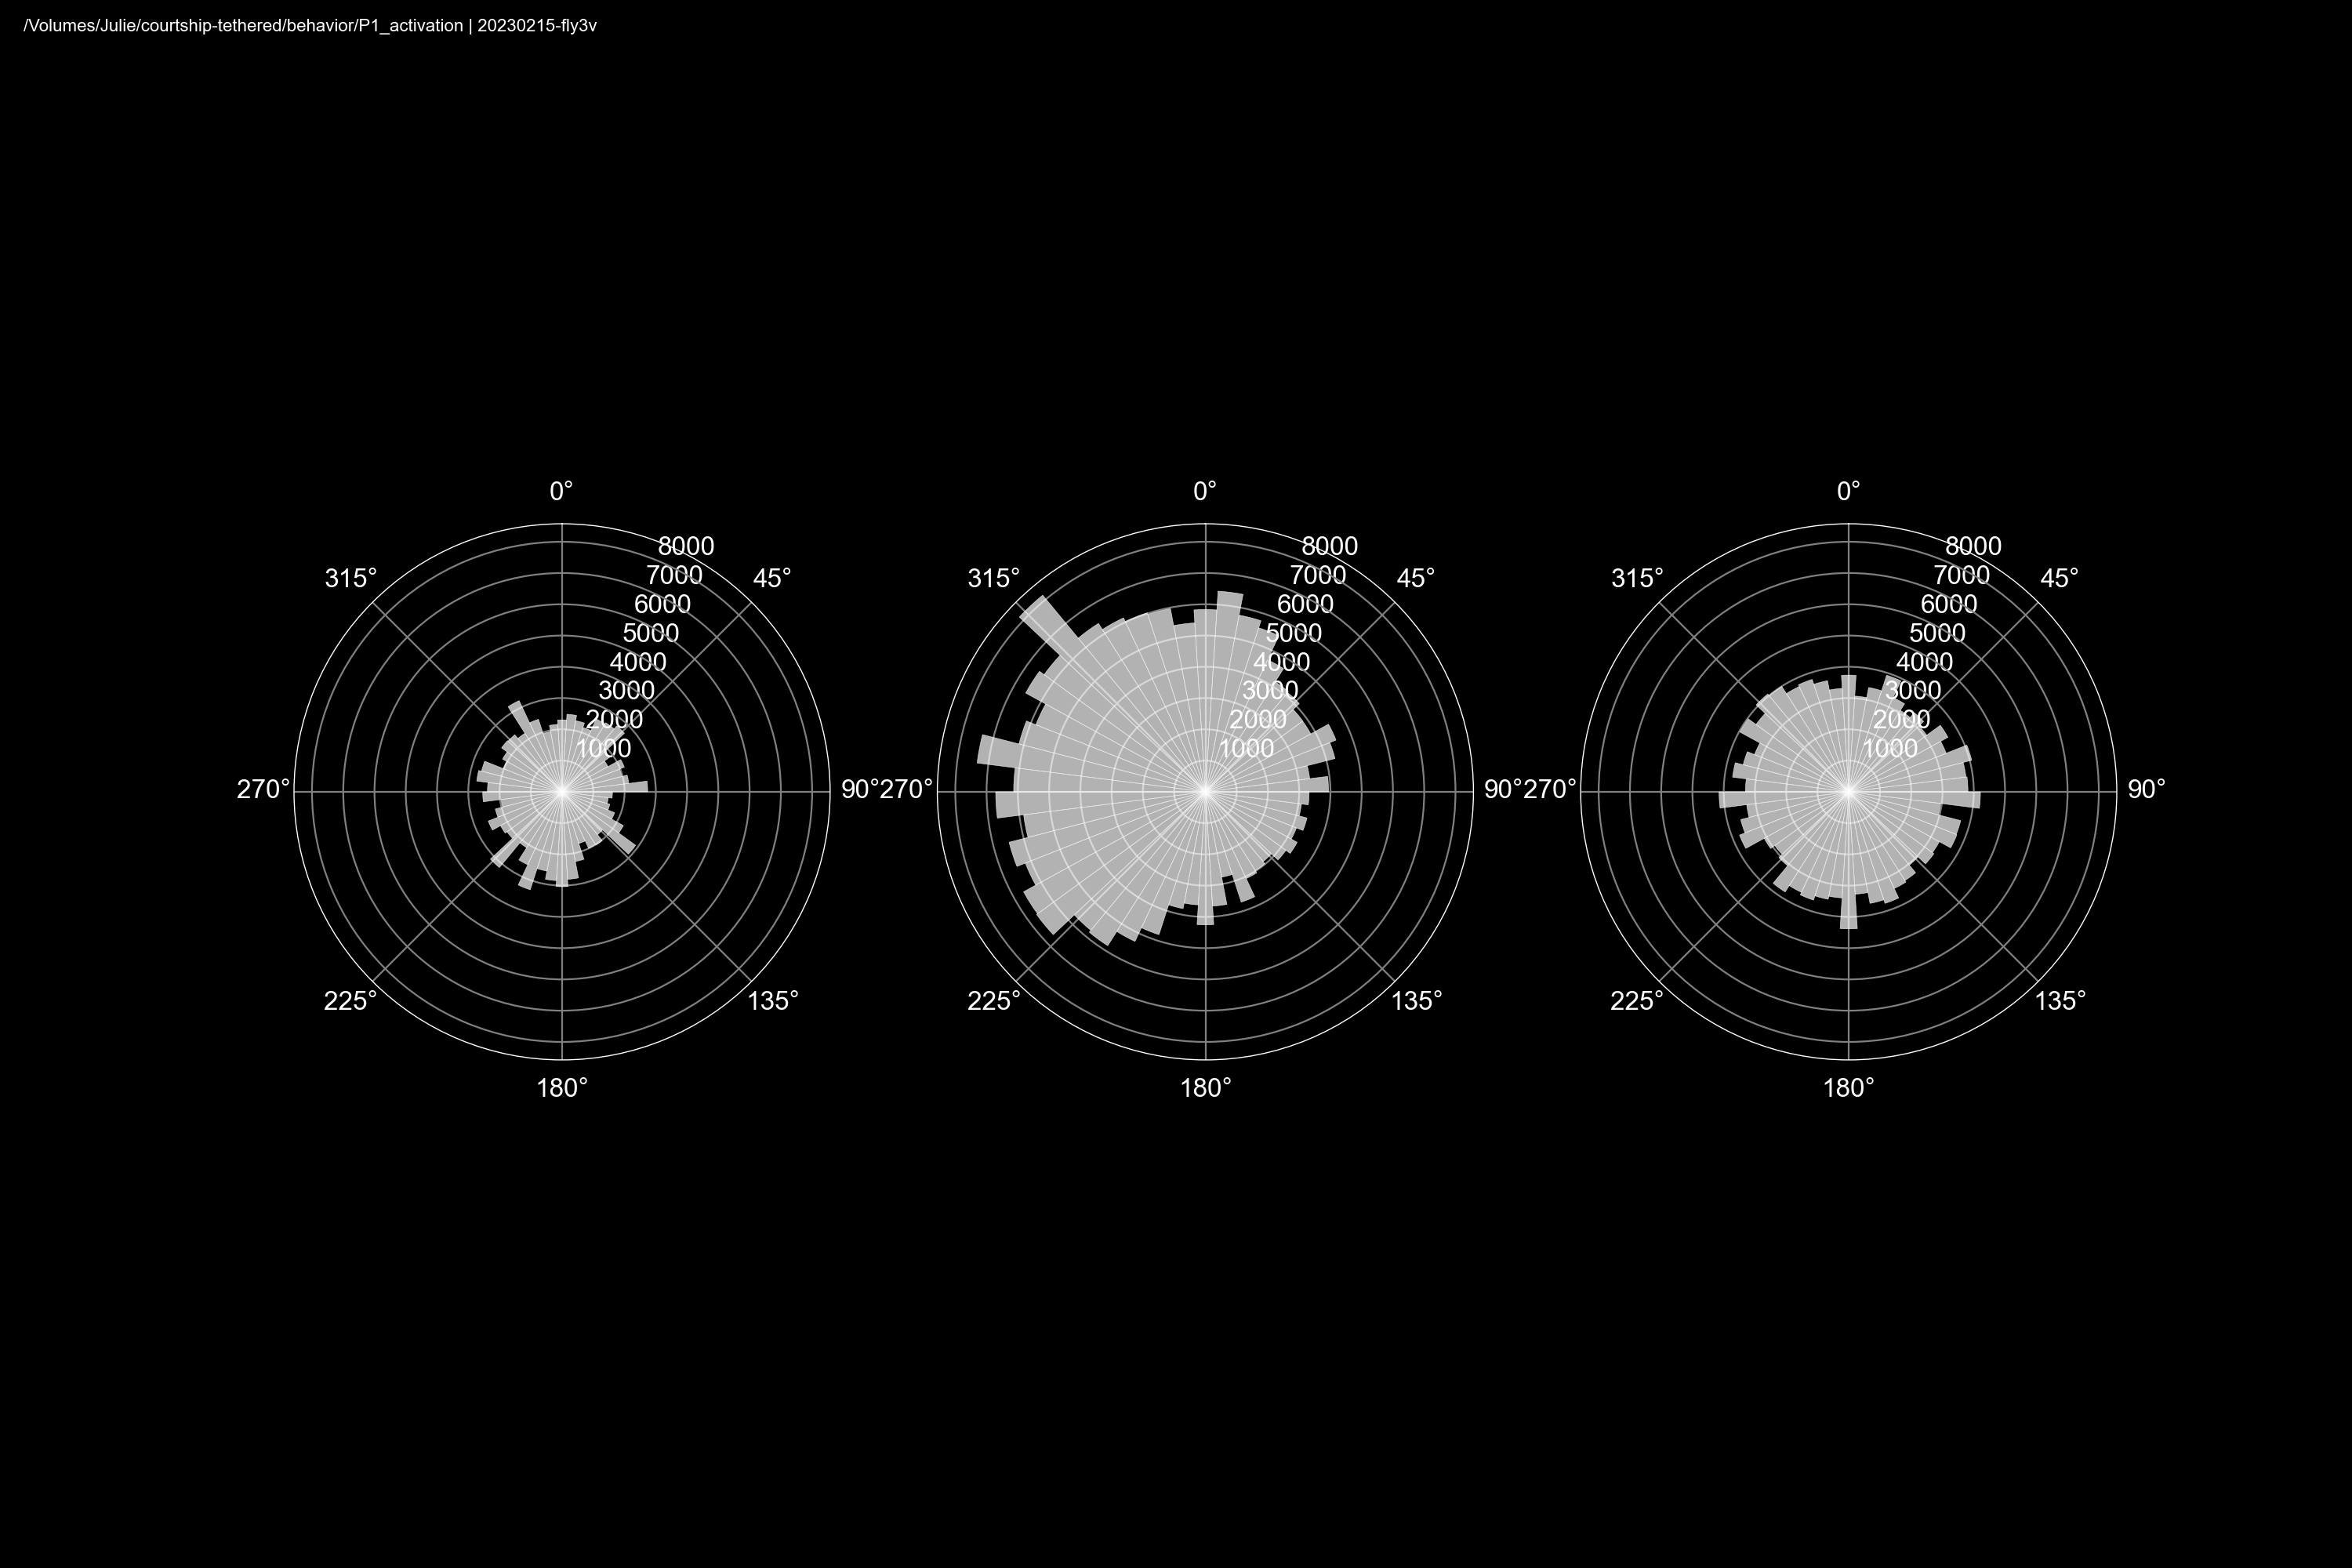

20230215-162717_P1_activation_fly3vM-P1-ChR-2do-dark-ledoff_000
20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000
20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000
20230215-fly3v_heading


In [178]:
#fig, axn = pl.subplots(1, 2, figsize=(7,4), subplot_kw={'projection': 'polar'})
fig, axn = pl.subplots(1, len(fnames), figsize=(15,10), sharey=True, sharex=True, subplot_kw={'projection': 'polar'})
for fi, (fp, df_) in enumerate(df.groupby('filename')):
    print(fp)
    ax=axn[fi]
    putil.circular_hist(ax, df_['ft_heading'].values, bins=50,
                   facecolor='w', density=False, edgecolor='w', lw=0.25)
    
util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_heading'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)


In [181]:
colors = ['aquamarine', 'lightskyblue', 'violet']
pal = dict((k, v) for k, v in zip(currdf['condition'].unique(), colors))

<IPython.core.display.Javascript object>


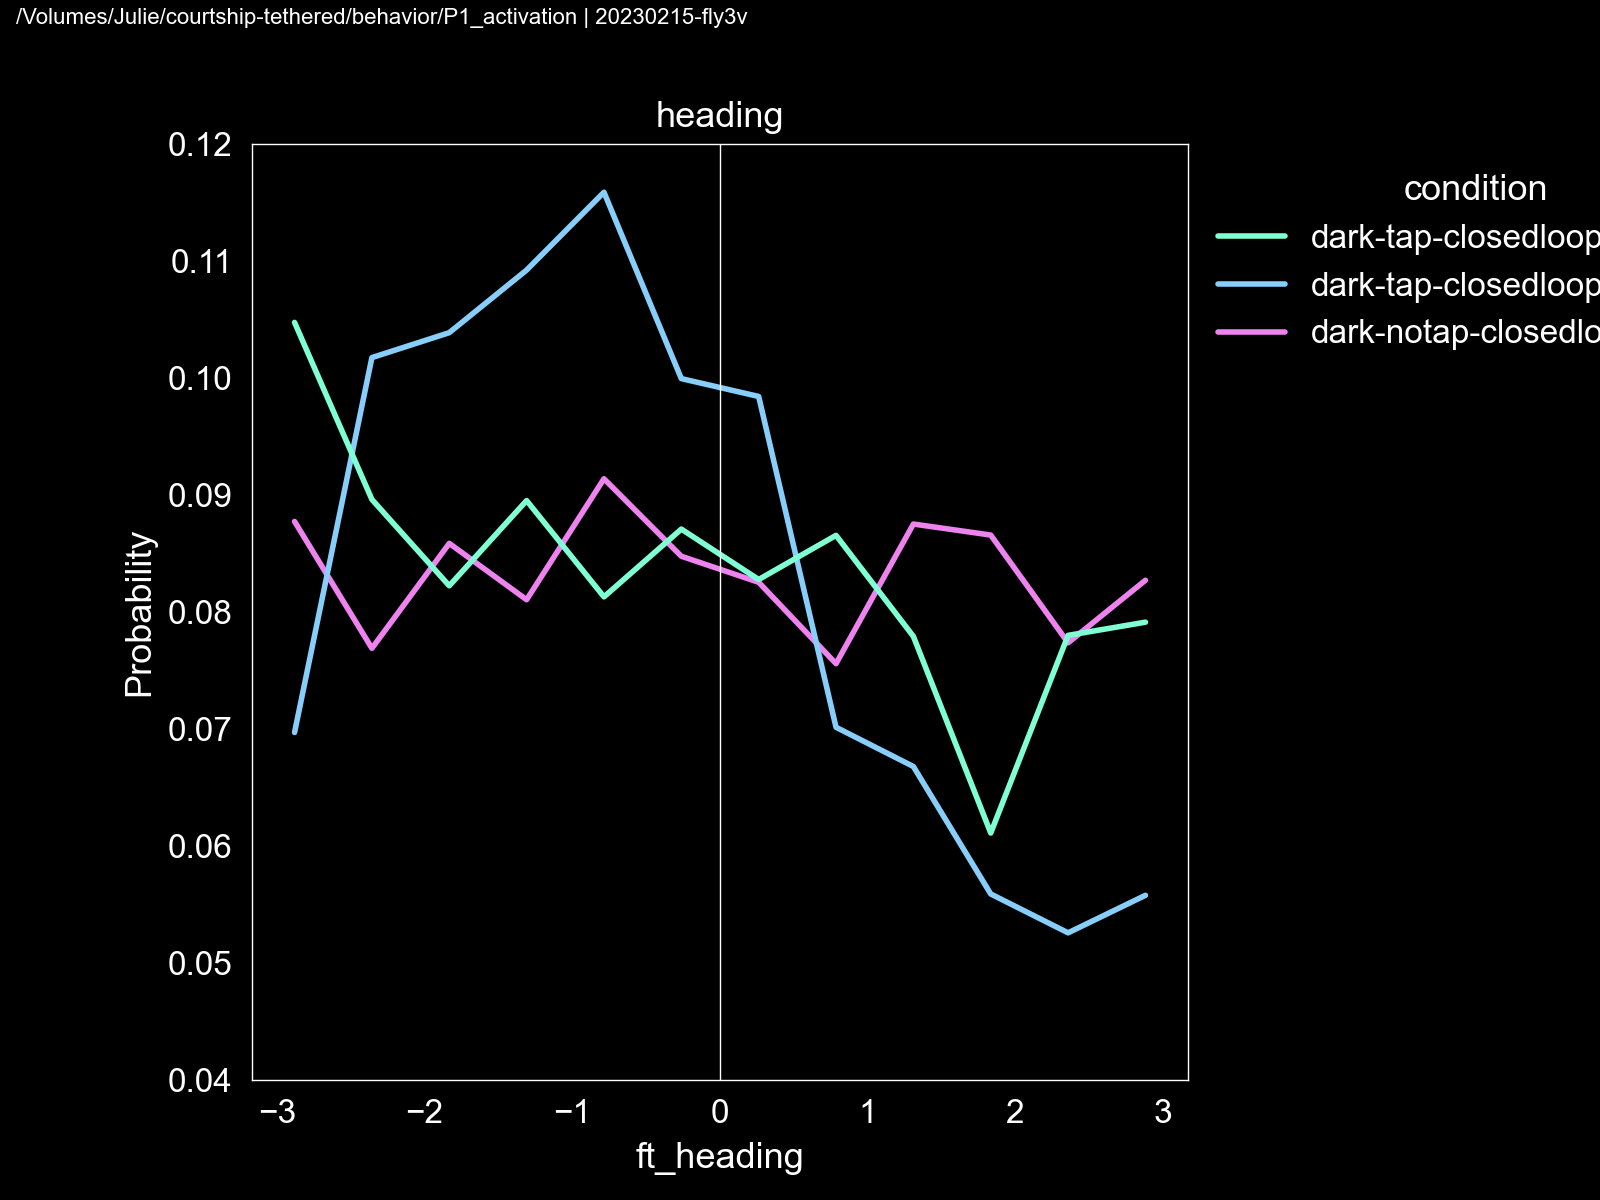

20230215-fly3v_heading-hist


In [241]:

fnames = ['20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000', '20230215-172354_P1_activation_fly3vM-P1-ChR-2do-dark-ledon-notap_000']
#fnames = ['20230214-135500_P1_activation_fly1vM-cs-4do_002', '20230214-143528_P1_activation_fly1vM-cs-4do_004']

currdf = df.copy() #df[df['filename'].isin(fnames)].copy()
currdf.shape

n_bins = 12
fig, ax = pl.subplots(figsize=(8,6)) #, subplot_kw={'projection': 'polar'})
sns.histplot(data=currdf, x='ft_heading', hue='condition', bins=n_bins, ax=ax, 
             linewidth=2, element='poly', fill=False, palette=pal, stat='probability',
             common_norm=False, )
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax.set_ylim([0.04, 0.12])
ax.axvline(x=0, color='w', lw=0.5)
ax.set_title('heading')
ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.1)

util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_heading-hist'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)

<IPython.core.display.Javascript object>


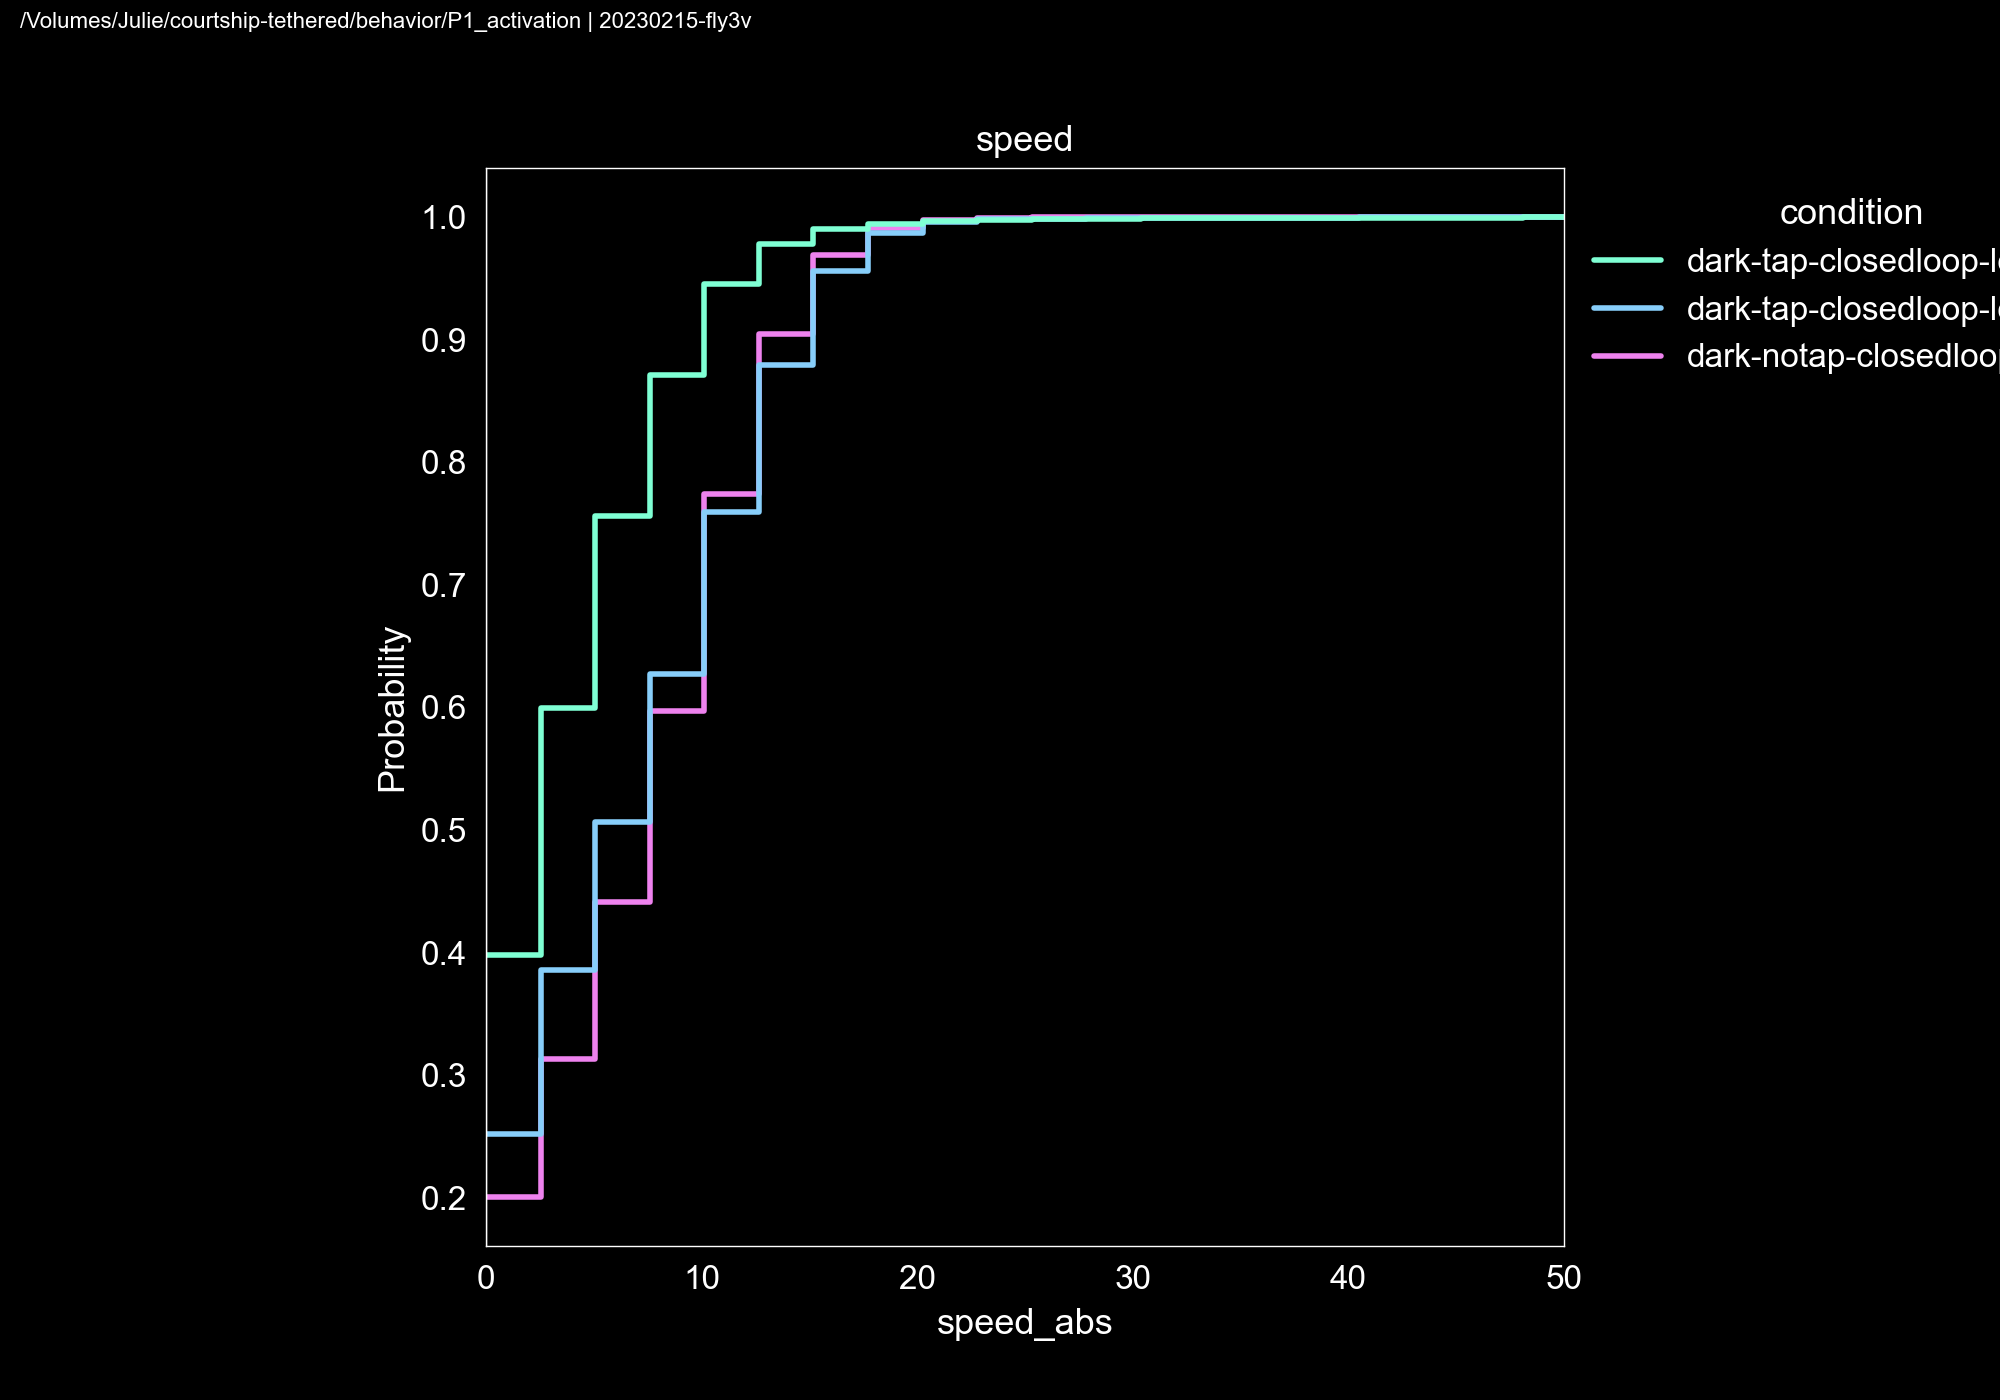

20230215-fly3v_speed-hist


In [217]:
currdf = df.copy() #df[df['filename'].isin(fnames)].copy()
currdf.shape

fig, ax = pl.subplots(figsize=(10,7)) #, subplot_kw={'projection': 'polar'})

sns.histplot(data=currdf, x='speed_abs', hue='condition', bins=50, ax=ax, 
             linewidth=2, element='step', kde=False, fill=False, palette=pal, 
             cumulative=True, common_norm=False, stat='probability')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)

ax.axvline(x=0, color='w', lw=0.5)
ax.set_title('speed')
ax.set_box_aspect(1)
ax.set_xlim([0, 50])

util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_speed-hist'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)), dpi=300)


In [208]:
vmin, vmax = df['ft_heading'].min(), df['ft_heading'].max()
labels_heading = np.linspace(vmin, vmax, 10)
bins_heading = np.linspace(vmin, vmax, 10)

labels_speed = np.arange(0, 10)
print(len(labels_speed))
df['binned_speed'] = pd.cut(df['speed_abs'], bins=10, labels=labels_speed)
df['binned_heading'] = pd.cut(df['ft_heading'], bins=bins_heading, labels=labels_heading[0:-1])


10


<IPython.core.display.Javascript object>


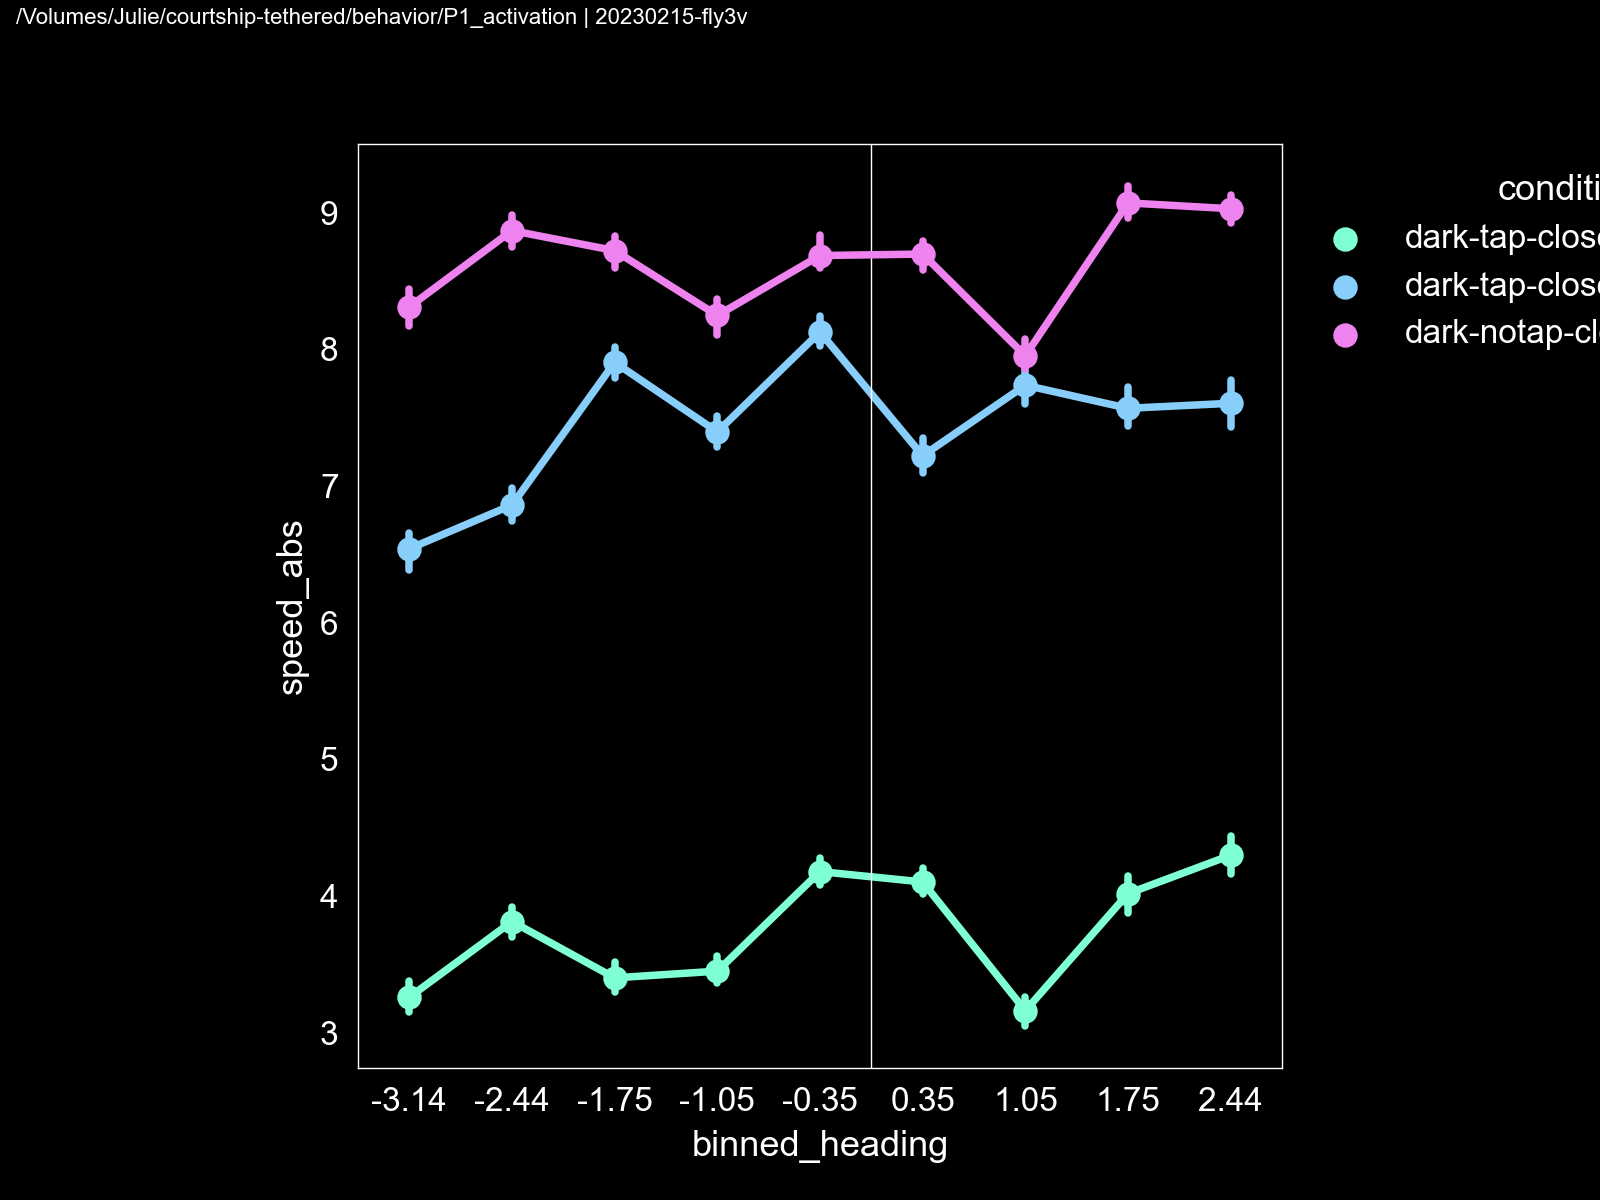

20230215-fly3v_speed-by-heading


In [243]:
from matplotlib.ticker import FormatStrFormatter

#df.groupby(['condition', 'binned_heading'])['speed'].mean()

fig, ax = pl.subplots(figsize=(8,6)) 
sns.pointplot(data=df, hue='condition', x='binned_heading', y='speed_abs', ax=ax, 
              palette=pal, estimator='median')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)

xvar_names = sorted(df['binned_heading'].unique())[0:-1]
ax.set_xticklabels(['{:.2f}'.format(i) for i in xvar_names])
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.axvline(x=4.5, color='w', lw=0.5)
ax.set_box_aspect(1)


util.label_figure(fig, '{} | {}'.format(fig_id, fly_id))
figname = '{}_speed-by-heading'.format(fly_id)
print(figname)

pl.savefig(os.path.join(figdir, '{}.png'.format(figname)), dpi=300)
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)), dpi=300)


In [394]:
bins_heading

array([-3.14157747, -2.92491646, -2.70825544, -2.49159443, -2.27493341,
       -2.0582724 , -1.84161138, -1.62495037, -1.40828935, -1.19162834,
       -0.97496732, -0.75830631, -0.5416453 , -0.32498428, -0.10832327,
        0.10833775,  0.32499876,  0.54165978,  0.75832079,  0.97498181,
        1.19164282,  1.40830384,  1.62496485,  1.84162586,  2.05828688,
        2.27494789,  2.49160891,  2.70826992,  2.92493094,  3.14159195])

(247250, 41)
['dark-tap-closedloop-ledon']


<IPython.core.display.Javascript object>


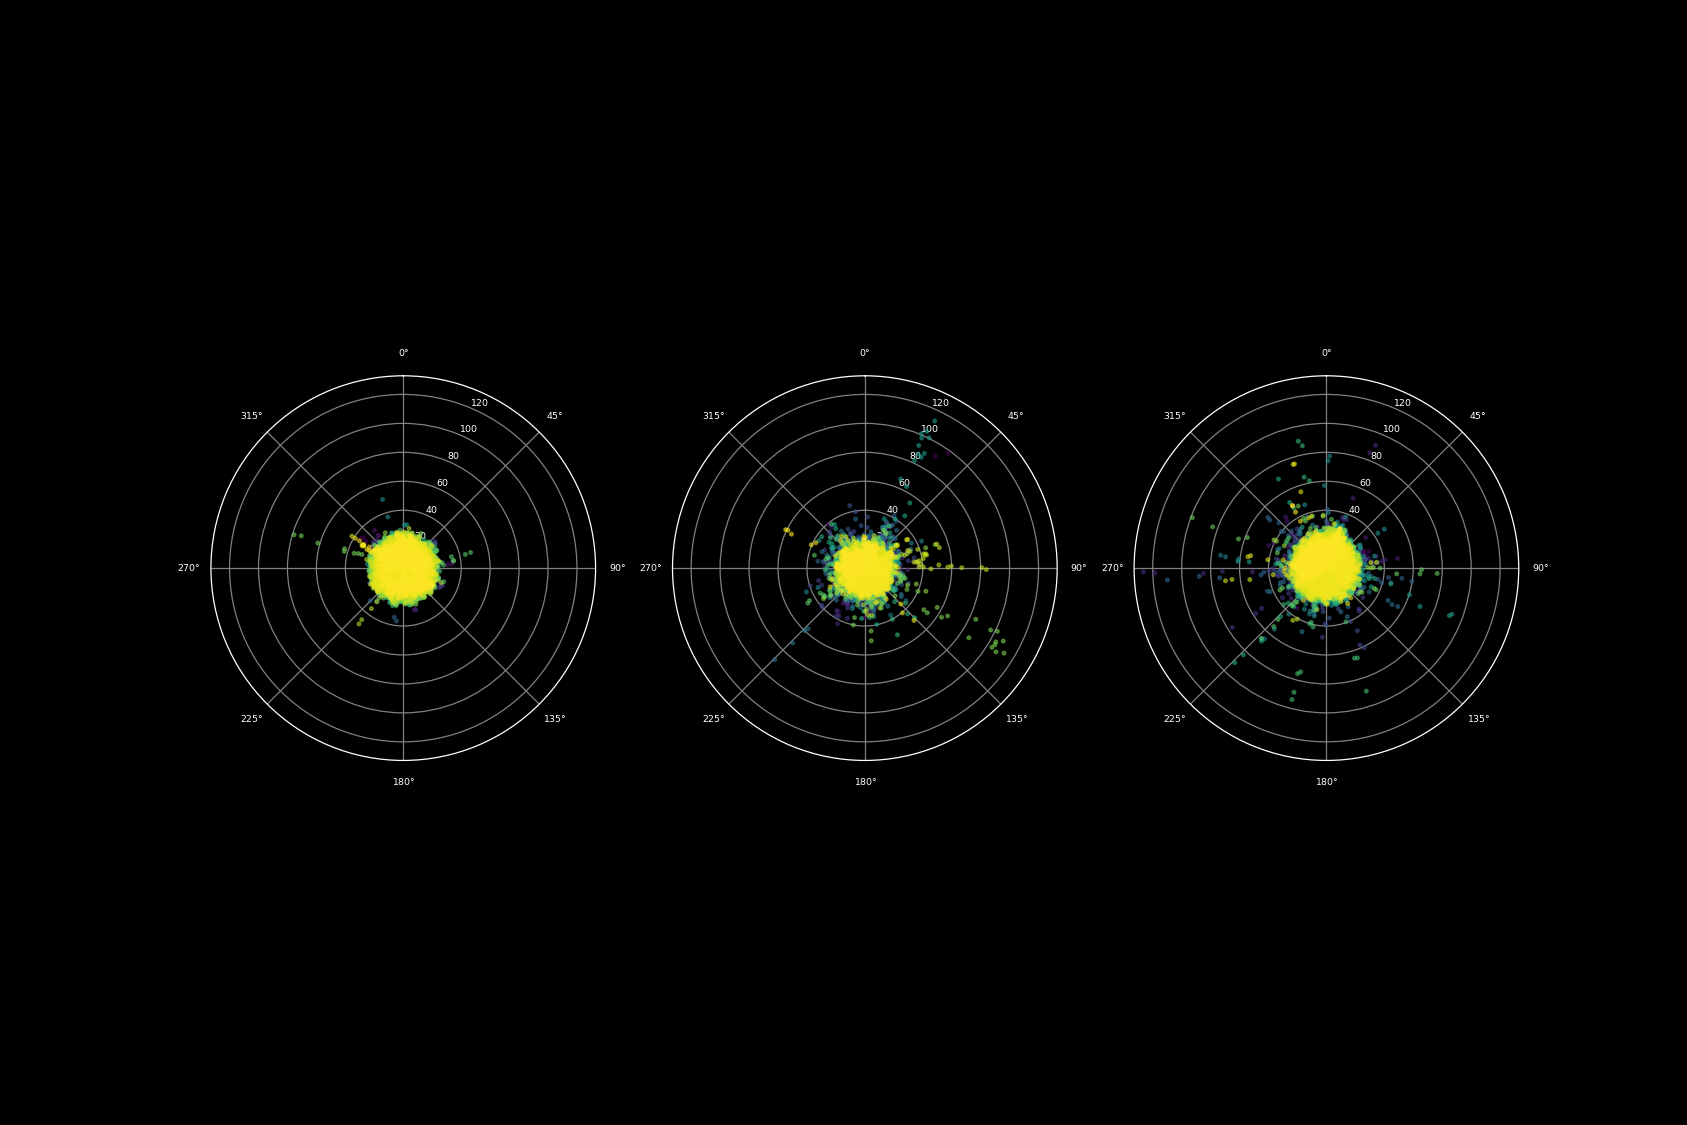

In [370]:
#fig, ax = pl.subplots()

df_ = df[df['filename']=='20230215-164618_P1_activation_fly3vM-P1-ChR-2do-dark-ledon_000'].copy()
print(df_.shape)

#sns.scatterplot(data=df_, x='ft_heading', y='speed', ax=ax, hue='duration_min', palette='viridis', edgecolor='none', alpha=0.5)

theta = df_['ft_heading'].values
r = df_['speed'].values
colors = df_['duration_min'].values

print(df_['condition'].unique())

fig, axn = pl.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(15,10), sharex=True, sharey=True)

#ax = fig.add_subplot(projection='polar')
for fi, (fn, df_) in enumerate(df.groupby('condition')):
    ax=axn[fi]
    theta = df_['ft_heading'].values
    r = df_['speed'].values
    colors = df_['duration_min'].values

    c = ax.scatter(theta, r, c=colors, s=5, cmap='viridis', alpha=0.5)
    ax.set_theta_offset(0)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1) 
